In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('/Users/michaelgoloshchapov/PycharmProjects/Physics/DataAnalysis_Sem2/Titanic/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
print(*data.columns)

PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked


In [3]:
data.Survived.sum()/data.PassengerId.nunique()

0.3838383838383838

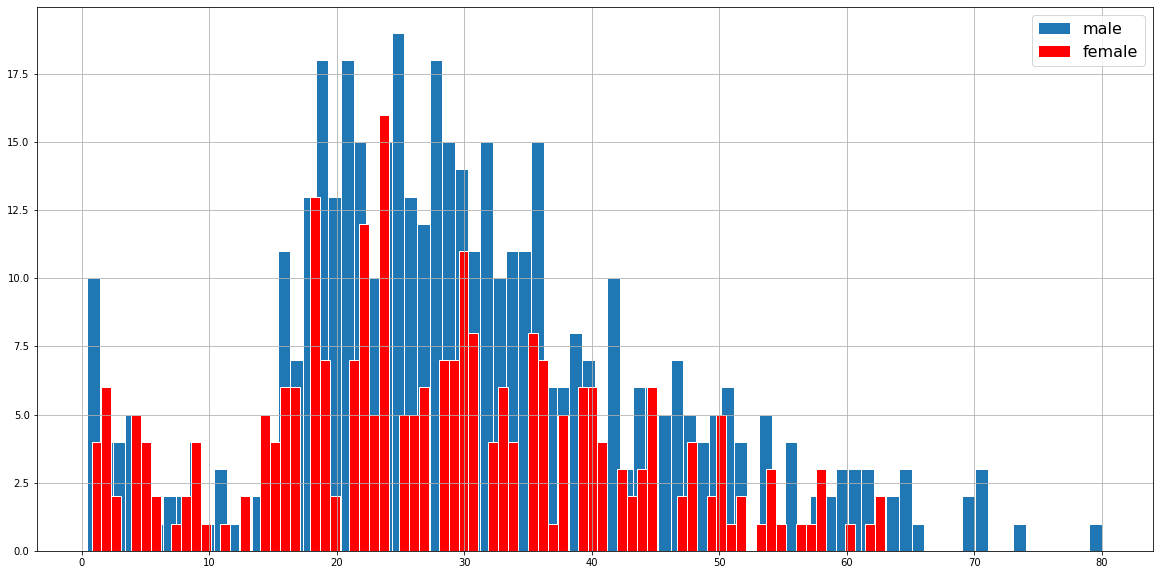

In [4]:
data[data["Sex"]== 'male']["Age"].hist(figsize=(20,10),
                                bins=80,
                                edgecolor='white',
                                grid=True)

ax = data[data['Sex'] == 'female']["Age"].hist(figsize=(20,10),
                      bins=80,
                      edgecolor="white",                  
                      grid = True,
                      color='red')

ax.legend(['male', 'female'], prop ={'size':16})

In [5]:
#  68% женщин выжили
data[(data.Sex == 'female') & (data.Survived == 1)].PassengerId.nunique() / data[data.Survived == 1].PassengerId.nunique() 

0.6812865497076024

In [6]:
#  32% мужчин выжило
data[(data.Sex == 'male') & (data.Survived == 1)].PassengerId.nunique() / data[data.Survived == 1].PassengerId.nunique() 

0.31871345029239767

# H1+

- Вероятность выживания женщины почти в 2 раза больше вероятности выживания мужчины
- 68.1% против 31.9%

# H2
- средний возраст выжившего 28 лет
- средний возраст умершего 30 лет

Возраст, видимо, не решает

In [7]:
print('Mean_Dead:', data[data.Survived == 0]["Age"].mean())
print('Mean_Alive:', data[data.Survived == 1]["Age"].mean())

Mean_Dead: 30.62617924528302
Mean_Alive: 28.343689655172415


<AxesSubplot:xlabel='Age'>

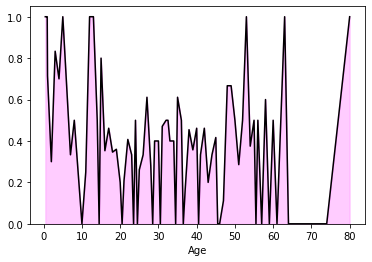

In [169]:
data.groupby(["Age"]).mean()['Survived'].plot(kind = 'area', color = 'magenta', alpha = 0.2)
data.groupby(["Age"]).mean()['Survived'].plot(color = 'black')

- из графика видно, что корреляция выживаемость(возраст) отсутсвует
- можно предположить, что будет корелляция, если разбить людей на группы 0-10 лет, 11-20 лет...

In [9]:
# data.hist(data.groupby(['Age']).mean()['Survived'])
data.groupby(["Survived"]).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Fare'>

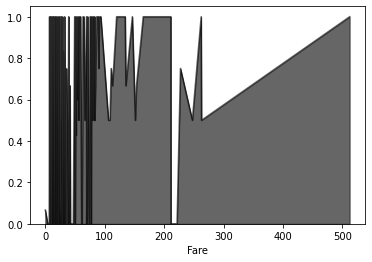

In [216]:
data.groupby(['Fare']).mean()['Survived'].plot.area(color = 'black', alpha = 0.6)

- более богатый $\nrightarrow$ более живучий
- начиная с примерно 263$ можно заметить "тренд"(думаю, что это может быть выбросом, так как всего 3 пассажира с такими билетами)

In [214]:
print('-----------------')
print(data.Fare[data.Fare > 250])
print('-----------------')
print(data.Fare[data.Fare > 270])

-----------------
27     263.0000
88     263.0000
258    512.3292
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: Fare, dtype: float64
-----------------
258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64


In [11]:
data.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

- можно предположить, что человек из 1-го класса выживает в среднем лучше, чем из 2-го и т.д.

In [12]:
data.groupby('SibSp')[['Survived' ,'Age', 'Pclass', 'Fare']].mean()

,Survived,Age,Pclass,Fare
SibSp,,,,
0,0.345395,31.397558,2.351974,25.692028
1,0.535885,30.089727,2.057416,44.147370
2,0.464286,22.620000,2.357143,51.753718
3,0.250000,13.916667,2.562500,68.908862
4,0.166667,7.055556,3.000000,31.855556
5,0.000000,10.200000,3.000000,46.900000
8,0.000000,NaN,3.000000,69.550000


# H3
- процент выживших с таким <параметр> от числа пассажиров с таким <параметр>
- в качестве параметров интересно взять возраст, цену билета, класс пассажира, количество родственников, тип кабины(A, B, etc.)


- также интересно подумать над перекрестными метриками(возможно, есть корелляция между возрастом и ценой билета, etc.)
- также интересно объеденить три параметра(процент мужчин выживших в каюте типа C)


- если у человека были родственники, то сколько из них выжило(думаю, что семьи выживают чаще)
- возможно, люди с меньшим номером билета выживали чаще, так как на них, например, спасательные места зарезервировали

<AxesSubplot:ylabel='Cabin'>

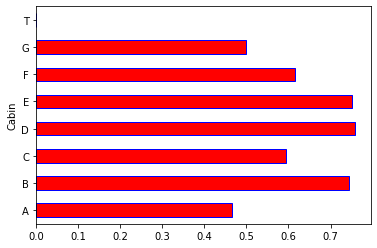

In [170]:
data.groupby(data['Cabin'].str.get(0)).mean()['Survived'].plot.barh(color='red', edgecolor = 'b')

- Можно сделать вывод, что люди из кабинок B,D,E более живучи

In [5]:
# for i in range(len(data.PassengerId))

a = float(input('Пороговое значение(от 0 до 1):'))
b = int(input("Размер выборки(от 1-го пассажира до ввода):"))
Scores = []
for i in range(b):
    score = 0
    
    #  scores for the cabin class
    try:
        if data["Cabin"][i][0] == 'A':
            score += 0.466667
        elif data["Cabin"][i][0] == 'B':
            score += 0.744681
        elif data["Cabin"][i][0] == 'C':
            score += 0.593220
        elif data["Cabin"][i][0] == 'D':
            score += 0.757576
        elif data["Cabin"][i][0] == 'E':
            score += 0.750000
        elif data["Cabin"][i][0] == 'F':
            score += 0.615385
        elif data["Cabin"][i][0] == 'G':
            score += 0.500000
        else:
            score += 0.1
    except TypeError:
        score += 0.1
    
    # scores for the sex
    if data["Sex"][i] == 'male':
        score += 0.31871345029239767
    else:
        score += 0.6812865497076024
    
    if score >= a:
        Scores += [1]
    else:
        Scores += [0]
        
        
corr = 0
for i in range(b):
    if data['Survived'][i] == Scores[i]:
        corr += 1
print("Предсказания верны на {}%".format(round(corr/b * 100,1)))

Пороговое значение(от 0 до 1):0.75
Размер выборки(от 1-го пассажира до ввода):800
Предсказания верны на 76.9%


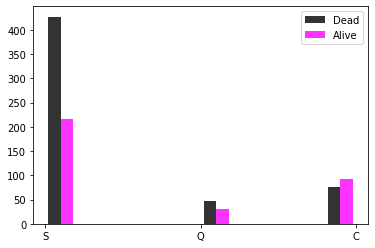

In [117]:
col_0 = data[data.Survived == 0]['Embarked'].dropna()
col_1 = data[data.Survived == 1]['Embarked'].dropna()
plt.hist([col_0, col_1], alpha = 0.8, label = ['Dead', 'Alive'], color = ['black', 'magenta'])

plt.legend()
plt.show()

Выводы: 
- Люди из категории S мрут как мухи, Q чуть получше
- Пассажиры из C показывают наилучшую выживаемость

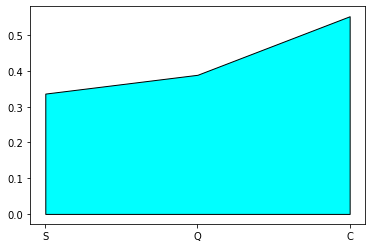

In [194]:
df = data.groupby(data['Embarked'].dropna())['Survived'].mean()
plt.fill_between(['S', 'Q', 'C'], [df["S"], df['Q'], df['C']], color = 'cyan', edgecolor = 'black')